In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score # métrica de evaluación
from sklearn.metrics import classification_report
from sklearn import metrics

In [2]:
df_nasa = pd.read_csv('https://raw.githubusercontent.com/pokengineer/DataScience/main/datasets/asteroids_nasa.csv')
df_nasa.head(5)

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


Salteo el análisis ya que es un dataset que conocemos
# Preprocesamiento de datos

In [3]:
# dropeo ['Orbiting Body','Equinox'] porque en todos los casos es earth y J2000
df_nasa.drop(['Orbiting Body','Equinox'],axis=1, inplace=True)

In [4]:
def preparacion_de_datos(df_input, target, escalar_valores=False):
  flag_que_hay_que_borrar = False # esto no sirve de nada, hay que borrarlo
  df = df_input.drop(['Close Approach Date','Orbit Determination Date'],axis=1)
  if escalar_valores and flag_que_hay_que_borrar:
    scaler_X = StandardScaler(with_mean=True, with_std=True)
    scaler_X.fit(df.drop(target,axis=1))
    x = pd.DataFrame(scaler_X.transform(df.drop(target,axis=1),), columns = df.drop(target,axis=1).columns )
  else:
    x = df.drop(target,axis=1)
  y = df[target]
  return x,y

In [5]:
X_nasa, y_nasa = preparacion_de_datos( df_nasa, "Hazardous" ,escalar_valores=False)

In [6]:
# Hacemos el Split 70-30 para train-test
X_train, X_test, y_train, y_test = train_test_split(X_nasa, y_nasa,
                                                    test_size=0.3, stratify = y_nasa, random_state=0)

In [7]:
from sklearn.linear_model import LogisticRegression

# Creamos y entrenamos el modelo
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [8]:
y_pred_lg = logreg.predict(X_test)

#Exactitud del modelo
print('Exactitud (accuracy) del modelo: {:.2f} %'.format(accuracy_score(y_test, y_pred_lg)*100))
print("-"*100)

# Reporte del clasificador
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_lg))

Exactitud (accuracy) del modelo: 83.87 %
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

       False       0.84      1.00      0.91      1180
        True       0.00      0.00      0.00       227

    accuracy                           0.84      1407
   macro avg       0.42      0.50      0.46      1407
weighted avg       0.70      0.84      0.77      1407



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Comparamos por curva ROC los modelos

In [9]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

treeclf = DecisionTreeClassifier(max_depth=10, random_state=1)
treeclf.fit(X_train, y_train)
y_pred_tc = treeclf.predict(X_test)

bayes_multi = MultinomialNB()
bayes_multi.fit(X_train, y_train)
y_pred_nb = bayes_multi.predict(X_test)

bayes_gauss = GaussianNB()
bayes_gauss.fit(X_train, y_train)
y_pred_gauss = bayes_gauss.predict(X_test)

knn = DecisionTreeClassifier(max_depth=10, random_state=1)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

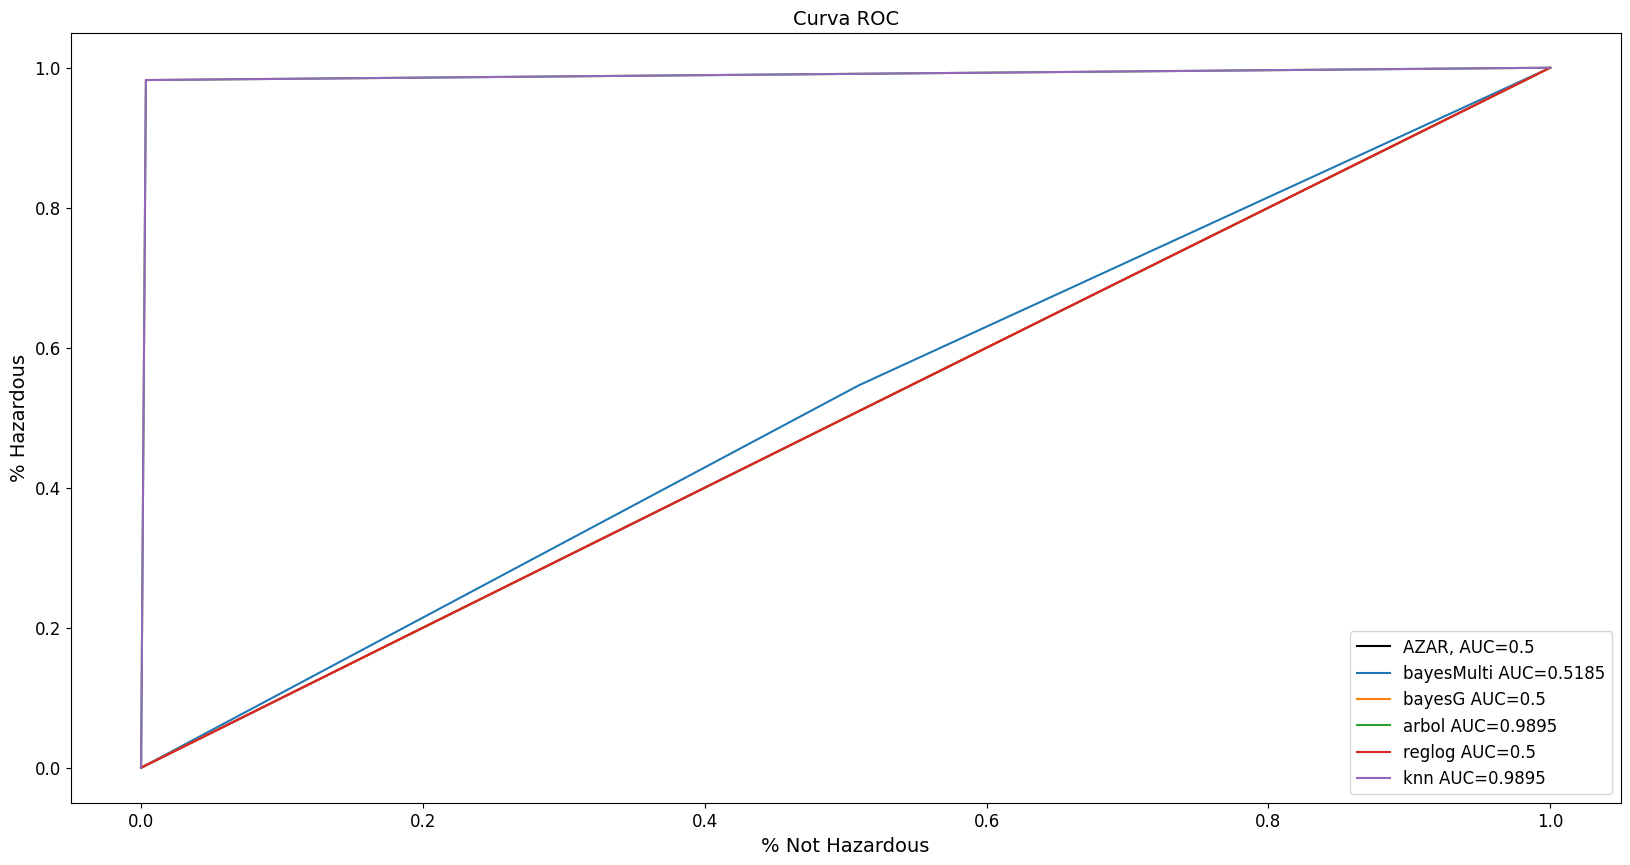

In [15]:
def graficarCurvaRoc( y_pred, model ):
  fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
  auc = metrics.roc_auc_score(y_test, y_pred)
  # Graficamos
  plt.plot(fpr,tpr,label= model +" AUC="+str(round(auc,4))) #,label= "AUC="+str(auc))
  plt.legend(loc=4, fontsize=12)
  return auc

# Inicializamos los labels del gráfico
plt.figure(figsize=(20, 10))
plt.xlabel('% Not Hazardous', fontsize=14)
plt.ylabel('% Hazardous', fontsize=14)

# Graficamos la recta del azar
it = [i/100 for i in range(100)]
plt.plot(it,it,label="AZAR AUC=0.5",color="black")

modelos = {'bayesMulti':y_pred_nb, 'bayesGauss':y_pred_gauss,
             'arbol':y_pred_tc , 'reglog':y_pred_lg,'knn':y_pred_knn}
for pred in modelos:
    auc = graficarCurvaRoc( modelos[pred] , pred )

# Agregamos el titulo y configuro el tamaño de letra
plt.title("Curva ROC", fontsize=14)
plt.tick_params(labelsize=12);
plt.show()

# Mejoramos el modelo elegido con GridSearch

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = { ____ }
clf = GridSearchCV( _____ , parameters)
clf.fit(X_train, y_train)

# Ejercicio
- Finalizar la funcion de preprocesamiento de datos para escalar los parametros. probar RegLog con el dataset escalado.
- graficar la curva roc para los resultados que obtenemos escalando los valores (en las variables que corresponda)
- Completar la sección del código dedicada a GridSearchCV, comparar el mejor modelo con los otros modelos.